In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_classification
from sklearn.svm import SVC


In [5]:
df = pd.read_csv('/content/sample-malicious-traffic-ICMP-Flooding.csv')


In [6]:
df

,Time,Source,Destination,Protocol,Length,Source Port,Destination Port,bad_packet
0,0.000000,VMware_8a:60:5f,Broadcast,ARP,60.0,NaN,NaN,0.0
1,0.081233,VMware_8a:12:84,Broadcast,ARP,60.0,NaN,NaN,0.0
2,0.217863,VMware_8a:7e:e9,Broadcast,ARP,60.0,NaN,NaN,0.0
3,0.419426,VMware_8a:b2:34,Broadcast,ARP,60.0,NaN,NaN,0.0
4,0.559886,VMware_8a:4e:1c,Broadcast,ARP,60.0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...
625895,22.322436,192.167.5.35,192.167.5.22,ICMP,42.0,NaN,NaN,1.0
625896,22.322440,192.167.5.35,192.167.5.22,ICMP,42.0,NaN,NaN,1.0
625897,22.322444,192.167.5.35,192.167.5.22,ICMP,42.0,NaN,NaN,1.0
625898,22.322447,192.167.5.35,192.167.5.22,ICMP,42.0,NaN,NaN,1.0


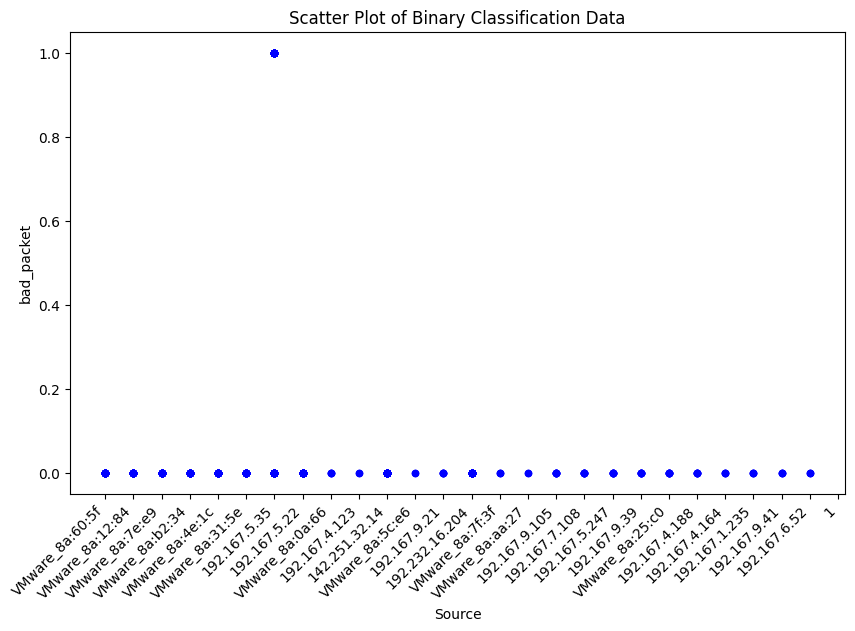

In [7]:
# df.dtypes
# df.columns
# df.describe()
# df.info()
df.head()

fig, ax = plt.subplots(figsize=(10,6))

plt.xlabel('Source')
plt.ylabel('Bad Packet Count')
plt.title('Scatter Plot of Binary Classification Data')
df.plot(kind='scatter',
        x='Source',
        y='bad_packet',
        c='blue',
        ax=ax)
plt.xticks(rotation=45, ha='right')
plt.show()

In [8]:
le = LabelEncoder()
df['Source'] = le.fit_transform(df['Source'])
df['Protocol'] = le.fit_transform(df['Protocol'])
df['Destination'] = le.fit_transform(df['Destination'])


X = df[['Source', 'Protocol']].values[3000:3300]
y = df['bad_packet'].values[3000:3300]

X

array([[8, 2],
       [8, 2],
       [8, 2],
       [6, 2],
       [8, 2],
       [8, 2],
       [8, 2],
       [6, 2],
       [8, 2],
       [8, 2],
       [8, 2],
       [6, 2],
       [8, 2],
       [8, 2],
       [8, 2],
       [6, 2],
       [8, 2],
       [8, 2],
       [8, 2],
       [8, 2],
       [6, 2],
       [8, 2],
       [8, 2],
       [8, 2],
       [6, 2],
       [8, 2],
       [8, 2],
       [8, 2],
       [8, 2],
       [6, 2],
       [8, 2],
       [8, 2],
       [8, 2],
       [8, 2],
       [8, 2],
       [6, 2],
       [8, 2],
       [8, 2],
       [8, 2],
       [6, 2],
       [8, 2],
       [8, 2],
       [8, 2],
       [8, 2],
       [8, 2],
       [6, 2],
       [8, 2],
       [8, 2],
       [8, 2],
       [8, 2],
       [6, 2],
       [8, 2],
       [6, 2],
       [6, 2],
       [8, 2],
       [8, 2],
       [8, 2],
       [8, 2],
       [6, 2],
       [8, 2],
       [6, 2],
       [8, 2],
       [8, 2],
       [8, 2],
       [6, 2],
       [8, 2],
       [6,

In [9]:
tf.random.set_seed(42)

class_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation="relu"),
])

class_model.compile(loss="binary_crossentropy",
                    optimizer=tf.keras.optimizers.Adam(),
                    metrics=["accuracy"])

class_model.fit(X,y,epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7400 - loss: 0.5836
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7400 - loss: 0.5652  
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7400 - loss: 0.5676 
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7400 - loss: 0.5518 
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7400 - loss: 0.5401  
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7400 - loss: 0.5326 
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7400 - loss: 0.5250 
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7400 - loss: 0.5160 
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7400 - loss: 0.5071 
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7400 - loss: 0.4989  
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7400 - loss: 0.4907 
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/ste

In [10]:

# Create a mesh grid for plotting decision boundary
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),  # Return 100 values evenly spaced between x_min -> x_max
                     np.linspace(y_min, y_max, 100))
# Create X Values to make predictions
x_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2D Arrs together
y_pred = class_model.predict(x_in) #Making predictions



313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


In [11]:


# -- Plotting Decision boundary created by model between malicious and non-malicious packets --

def plot_decision_boundary(model, X,y):

  # Create a mesh grid for plotting decision boundary
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),  # Return 100 values evenly spaced between x_min -> x_max
                     np.linspace(y_min, y_max, 100))
  # Create X Values to make predictions
  x_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2D Arrs together

  y_pred = class_model.predict(x_in) #Making predictions

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("Doing multiclass classification")
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    y_pred_labels = (y_pred >= 0.5).astype(int) # Convert probabilities to labels
  else:
    print("Doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)
  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.coolwarm, alpha=0.8)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.coolwarm, edgecolors='k')
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Doing binary classification


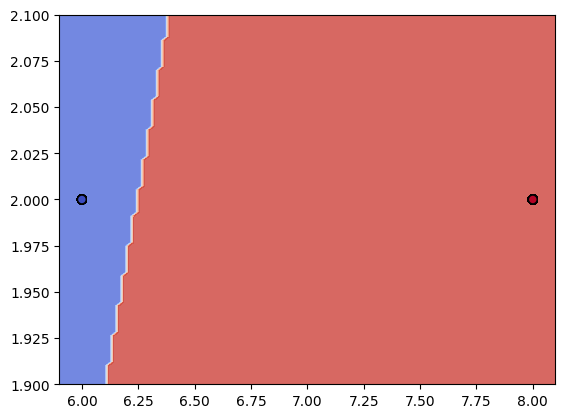

In [12]:
plot_decision_boundary(model=class_model,
                       X=X,
                       y=y)

<Axes: xlabel='Source', ylabel='Protocol'>

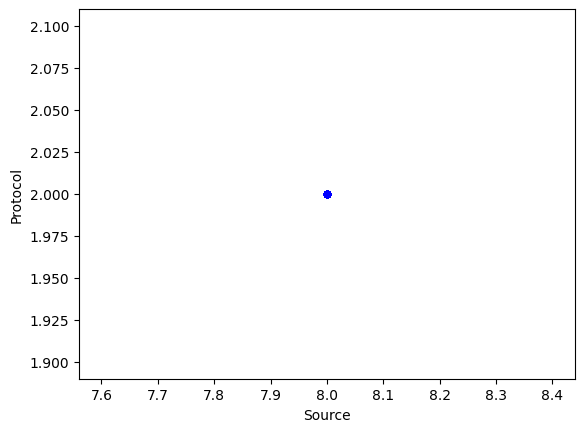

In [13]:
bad_packet_only = df[df.bad_packet > 0]
# Py Plot Method
bad_packet_only.plot(kind='scatter',
                     x='Source',
                     y='Protocol',
                     c='blue')

In [14]:
model_1 = tf.keras.Sequential([tf.keras.layers.Dense(1)])
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

len(X)
model_1.fit(X,y,epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2600 - loss: 11.9278  
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2600 - loss: 11.9278 
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2600 - loss: 11.9278 
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2600 - loss: 11.9278 
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2600 - loss: 11.9278 
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2600 - loss: 11.9278 
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2600 - loss: 11.9278 
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2600 - loss: 11.9278 
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2600 - loss: 11.9278 
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2600 - loss: 11.9278 
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2600 - loss: 11.9278 
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 

In [15]:
X.ndim

2

## Using example data from Sklearn

In [16]:
from sklearn.datasets import make_circles
n_samples = 1000
X,y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

In [17]:
circles = pd.DataFrame({"X0":X[:,0],
                        "X1":X[:,1],
                        "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


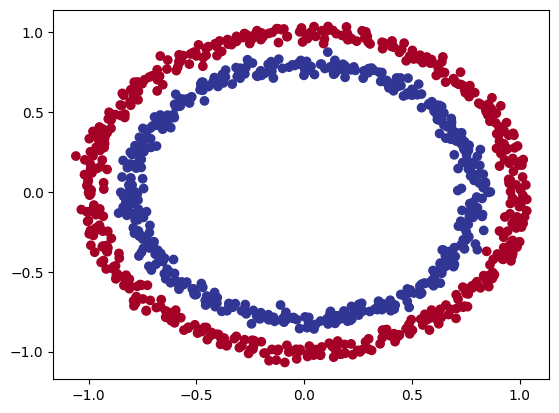

In [18]:
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

In [19]:
bad_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

bad_model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=["accuracy"])

bad_model.fit(X,y,epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 984us/step - accuracy: 0.4458 - loss: 4.0597  
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5122 - loss: 0.7107 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 997us/step - accuracy: 0.4848 - loss: 0.7024
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4216 - loss: 0.6993 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4551 - loss: 0.7007 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4515 - loss: 0.7016 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4500 - loss: 0.7023 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4467 - loss: 0.7029 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4479 - loss: 0.7034 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4466 - loss: 0.7039 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.4456 - loss: 0.7042 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/s

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 952us/step
Doing binary classification


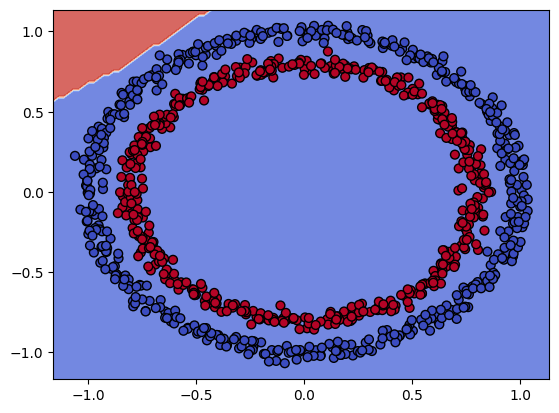

In [20]:
plot_decision_boundary(model=bad_model,
                       X=X,
                       y=y)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 930us/step
Doing binary classification


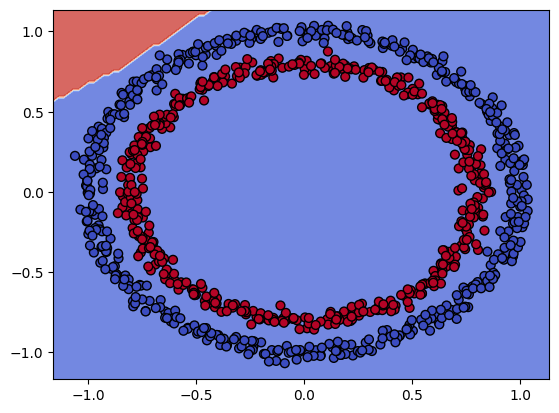

In [21]:
plot_decision_boundary(model=class_model,
                       X=X,
                       y=y)

# Tinkering with multiclass classification

In [22]:
# When you have more than two classes as an option, it's Mult-class classification
# Classifying different images of clothing (is it a shirt, shoe, pant)
# Data set is adapter from the tensorflow dataset module
# Data is already split into training and test data

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.datasets import make_classification
from sklearn.svm import SVC


In [27]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [31]:
# Training Sample
print(f"X_train shape: {X_train[0]} \n y_train shape: {y_train[0]}")

X_train shape: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1

In [32]:
# We can see that this first entry is mapped to label #9 -> Ankle boot

In [33]:
# Checking shape of example
X_train[0].shape, y_train[0].shape # 28x28 Tensor and a scalar

((28, 28), ())

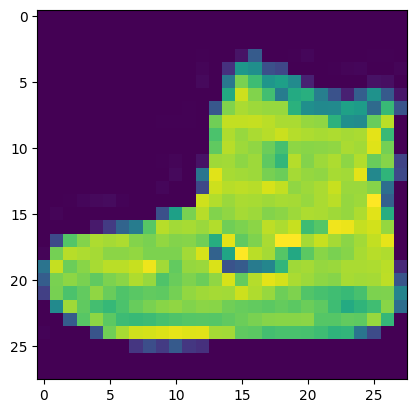

In [34]:
plt.imshow(X_train[0])

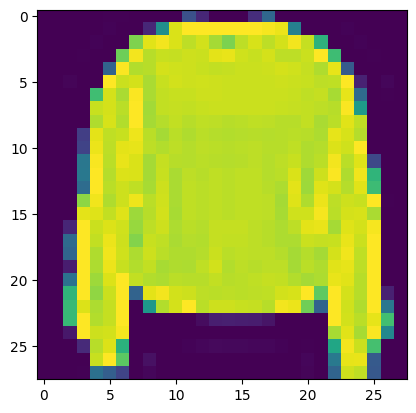

In [35]:
plt.imshow(X_train[7])

In [36]:
# Map lables to human-readble format

In [38]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
len(class_names) # Notice the len of possible classes is greater than 2

10

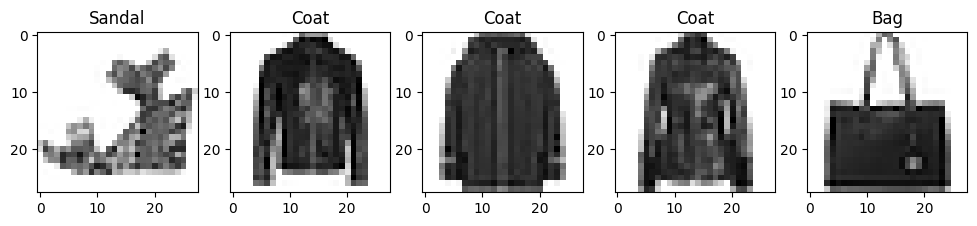

In [51]:
# Random num generator to get samples of data
selected_images = []
number_of_images = 5

for i in range(number_of_images):
  selected_index = np.random.randint(0, len(X_train))
  selected_images.append(selected_index)
  # plt.imshow(X_train[selected_index], cmap=plt.cm.binary)
  # plt.title(class_names[y_train[selected_index]])

# Create a figure with 1 row and number_of_images columns

fig, axs = plt.subplots(1, number_of_images, figsize=(12, 4))

# Plot each image in the dataset
for ax,index in zip(axs,selected_images):
  ax.imshow(X_train[index], cmap=plt.cm.binary)
  ax.set_title(class_names[y_train[index]])


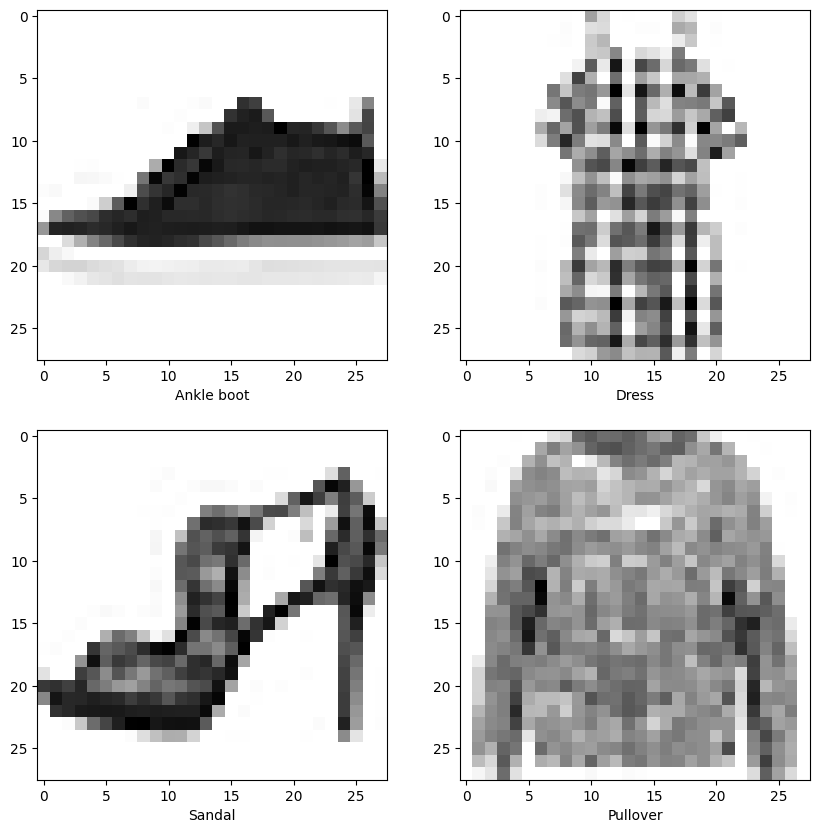

In [56]:
# another way to do this
# plot multiple random images
plt.figure(figsize=(10,10))
for i in range(4):
  ax = plt.subplot(2,2,i+1)
  rand_index =  np.random.choice(range(len(X_train)))
  plt.imshow(X_train[rand_index], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train[rand_index]])
plt.show()

### Building Mult-classclasification Model

In [58]:
# Binary and multi-class classification model are similar, but require a few tweaks
# Input Shape: Shape of one image 28x28
# Output Shape: shape 1 per class -> 10
# Loss function: tf.keras.losses.CategoricalCrossentropy
# Output Layer activation: Softmax (instead of sigmoid)

# Shape errors (look at the input shape, output shape, or loss function)
# Loss (loss on training data, how wrong the model is between training data)
# Accuracy (Percentage of correct predictions)
# Val* (same as before, but on validation data)

In [64]:
tf.random.set_seed(42)

#Create the model
multi_classification_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # data needed to flattened from 28x28 to None, 784
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax') # 10 instead of 1
])

# Compile
multi_classification_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # Allows for ints as lables
                                   optimizer=tf.keras.optimizers.Adam(),
                                   metrics=["accuracy"])

# Fit and evaluate the model
non_normalised_history = multi_classification_model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1526 - loss: 2.4874 - val_accuracy: 0.2236 - val_loss: 1.9502
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.2646 - loss: 1.8328 - val_accuracy: 0.3055 - val_loss: 1.6504
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2986 - loss: 1.6450 - val_accuracy: 0.3086 - val_loss: 1.6040
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3088 - loss: 1.6038 - val_accuracy: 0.3214 - val_loss: 1.5875
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3197 - loss: 1.5743 - val_accuracy: 0.3329 - val_loss: 1.5590
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3214 - loss: 1.5697 - val_accuracy: 0.3494 - val_loss: 1.5332
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3437 - loss: 1.5334 - val_accuracy: 0.3614 - val_loss: 1.5312
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3626 - loss: 1.4992 - val_accurac

# I could also use one_hot encoding to allow for the standard crossentropy (as the loss function expects)

In [65]:
tf.one_hot(y_train[:5], depth=10)

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)>

In [66]:
tf.random.set_seed(42)

#Create the model
multi_classification_model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # data needed to flattened from 28x28 to None, 784
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax') # 10 instead of 1
])

# Compile
multi_classification_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), # Expects one_hot_encoding
                                   optimizer=tf.keras.optimizers.Adam(),
                                   metrics=["accuracy"])

# Fit and evaluate the model
non_normalised_history = multi_classification_model.fit(X_train, tf.one_hot(y_train, depth=10), epochs=10, validation_data=(X_test, tf.one_hot(y_test,depth=10)))


Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.4600 - loss: 1.2668 - val_accuracy: 0.4611 - val_loss: 1.2521
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4616 - loss: 1.2548 - val_accuracy: 0.4598 - val_loss: 1.2358
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4639 - loss: 1.2342 - val_accuracy: 0.4609 - val_loss: 1.2308
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - accuracy: 0.4609 - loss: 1.2327 - val_accuracy: 0.4618 - val_loss: 1.2294
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4647 - loss: 1.2222 - val_accuracy: 0.4593 - val_loss: 1.2251
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4670 - loss: 1.2137 - val_accuracy: 0.4613 - val_loss: 1.2268
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4677 - loss: 1.2099 - val_accuracy: 0.4632 - val_loss: 1.2187
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4705 - loss: 1.2105 - val_accurac

## Trying to improve model


### Normalizing Data

In [69]:
multi_classification_model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 4)                   │           3,140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │              50 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

In [70]:
# Formatting data involved three steps
# 1. Turn all data into numbers
# 2. Make sure all of your tensors are in the right shape
# 3. Scale features (normalize or standardized (the numbers in tensors are between 0 and 1), neural networks tend to prefer normalization)

In [73]:
X_train.min(), X_train.max()

(0, 255)

In [74]:
# To standarize our data we can divide our training and testing by diving by the max

In [77]:
X_train_normalized = X_train / 255.0
X_test_normalized = X_test / 255.0

# Check min and max of scaled data
X_train_normalized.min(), X_train_normalized.max()

(0.0, 1.0)

In [78]:
tf.random.set_seed(42)

# Create model
new_normalized_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)), # data needed to flattened from 28x28 to None, 784
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax') # 10 instead of 1
])


# Compile model
new_normalized_model.compile(loss=tf.keras.losses.CategoricalCrossentropy(), # Expects one_hot_encoding
                                   optimizer=tf.keras.optimizers.Adam(),
                                   metrics=["accuracy"])

# Fit and Evaluate Model
new_normalized_history = new_normalized_model.fit(X_train_normalized, tf.one_hot(y_train, depth=10), epochs=10, validation_data=(X_test_normalized, tf.one_hot(y_test,depth=10)))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.4222 - loss: 1.5480 - val_accuracy: 0.7297 - val_loss: 0.7894
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7489 - loss: 0.7417 - val_accuracy: 0.7614 - val_loss: 0.6886
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7731 - loss: 0.6583 - val_accuracy: 0.7749 - val_loss: 0.6461
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7855 - loss: 0.6192 - val_accuracy: 0.7838 - val_loss: 0.6223
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7948 - loss: 0.5961 - val_accuracy: 0.7902 - val_loss: 0.6085
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8009 - loss: 0.5799 - val_accuracy: 0.7950 - val_loss: 0.5968
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.8047 - loss: 0.5680 - val_accuracy: 0.7954 - val_loss: 0.5900
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.8087 - loss: 0.5588 - 

In [80]:
# By normalizing our data I improved the performance of my model 2x!

<Axes: title={'center': 'Normalized Data'}>

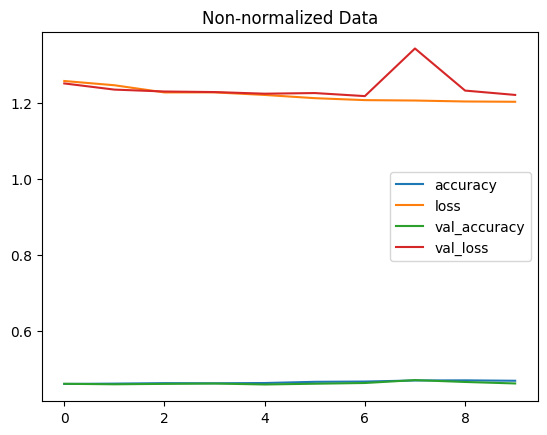

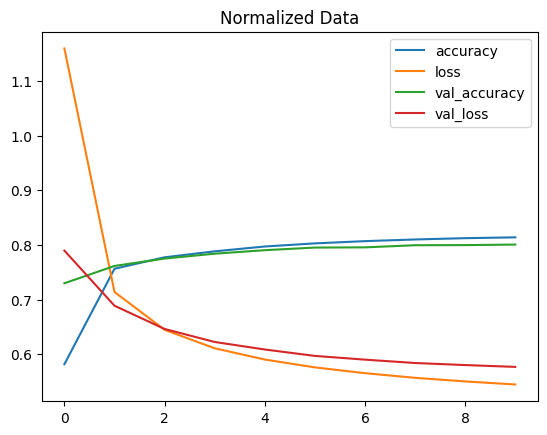

In [82]:
# Compare loss curves

pd.DataFrame(non_normalised_history.history).plot(title="Non-normalized Data")
pd.DataFrame(new_normalized_history.history).plot(title="Normalized Data")

In [84]:
# When comparing models, the same model with slightly different data, can produce dramatically different results, thus models should be compared using the same criteria

### Finding Ideal Learning Rate:
The learning rate is a hyperparameter that controls how much the model's weights are adjusted during each training iteration. A smaller learning rate means the model will learn more slowly, but may be more likely to find the optimal solution. A larger learning rate means the model will learn more quickly, but may overshoot the optimal solution.



In [88]:
# The number of neurons in the input layer is equal to the number of features in the data
# The number of neurons in the output layer is equal to shape of the label (in this case 10)

tf.random.set_seed(42)

lr_adjusted_multiclass_classification_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),]) # data needed to flattened from 28x28 to None, 78

lr_adjusted_multiclass_classification_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                                                    optimizer=tf.keras.optimizers.Adam(),
                                                    metrics=["accuracy"])


lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10 ** (epoch / 20)) # Start the LR @  1e-3 and increase the learning rate by 10 ** (epoch / 20)

# Fit the Model

find_lr_history = lr_adjusted_multiclass_classification_model.fit(X_train_normalized, y_train, epochs=40, validation_data=(X_test_normalized, y_test), callbacks=[lr_scheduler])

Epoch 1/40


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.2327 - loss: 1.9334 - val_accuracy: 0.5373 - val_loss: 1.3048 - learning_rate: 0.0010
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.5699 - loss: 1.2002 - val_accuracy: 0.6201 - val_loss: 1.0482 - learning_rate: 0.0011
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6395 - loss: 1.0126 - val_accuracy: 0.6682 - val_loss: 0.9658 - learning_rate: 0.0013
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6819 - loss: 0.9353 - val_accuracy: 0.6971 - val_loss: 0.9149 - learning_rate: 0.0014
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7026 - loss: 0.8840 - val_accuracy: 0.7221 - val_loss: 0.8678 - learning_rate: 0.0016
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7232 - loss: 0.8405 - val_accuracy: 0.7295 - val_loss: 0.8416 - learning_rate: 0.0018
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7318 - loss: 0.8087

Text(0.5, 1.0, 'Finding ideal learning rate')

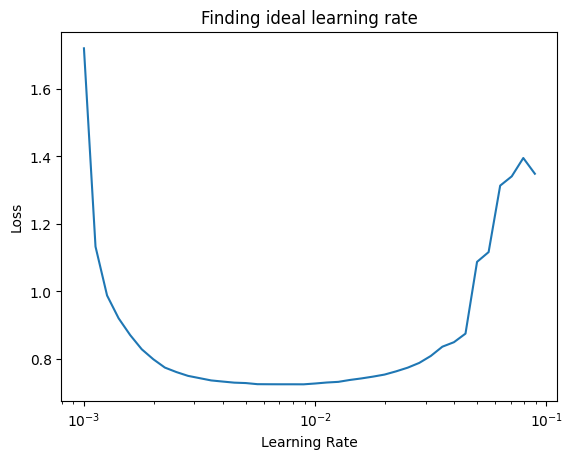

In [89]:
# Plot the learning rate decay curve

lrs = 1e-3 * (10 ** (tf.range(40) / 20))
plt.semilogx(lrs, find_lr_history.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title("Finding ideal learning rate")

## To find the ideal learning rate find the lowest point on the curve and go back a little in this case it's 10 ** -3 0.001

In [90]:
tf.random.set_seed(42)

ideal_lr_multiclass_classification_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),]) # data needed to flattened from 28x28 to None, 78

ideal_lr_multiclass_classification_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                                                    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                                                    metrics=["accuracy"])

ideal_lr_history = ideal_lr_multiclass_classification_model.fit(X_train_normalized, y_train, epochs=20, validation_data=(X_test_normalized, y_test))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.2244 - loss: 1.9905 - val_accuracy: 0.4713 - val_loss: 1.3880
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5119 - loss: 1.2934 - val_accuracy: 0.5723 - val_loss: 1.1039
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.5942 - loss: 1.0491 - val_accuracy: 0.6298 - val_loss: 0.9784
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6377 - loss: 0.9496 - val_accuracy: 0.6421 - val_loss: 0.9362
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.6482 - loss: 0.9095 - val_accuracy: 0.6521 - val_loss: 0.9120
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6589 - loss: 0.8857 - val_accuracy: 0.6576 - val_loss: 0.8958
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.6679 - loss: 0.8697 - val_accuracy: 0.6632 - val_loss: 0.8852
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6781 - loss: 0.8565 - 

In [91]:
# Evaluating the most improved model

In [92]:
# Creating a confusion matrix

In [107]:
# The cell at the intersection of "T-shirt/top" (actual) and "T-shirt/top" (predicted)  shows the number of T-shirts/tops that were correctly predicted.
# The cell at the intersection of "Trouser" (actual) and "Dress" (predicted) shows the number of Trousers that were incorrectly classified as Dresses.
# By examining the values in the confusion matrix, I gain insights into the model's performance, identify areas where the model is making mistakes, and assess its overall accuracy.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


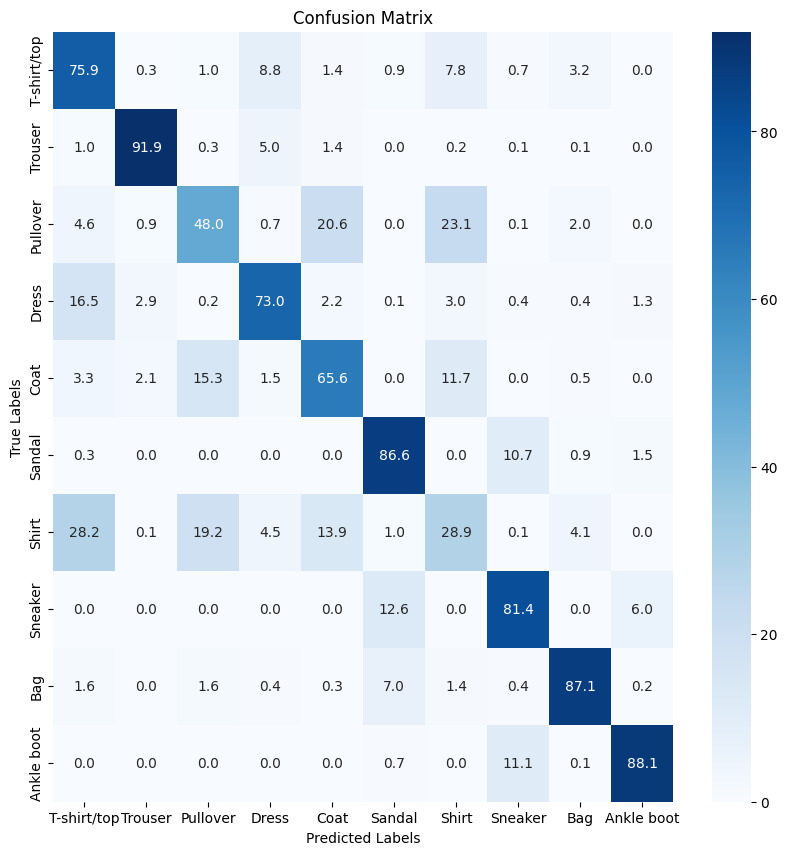

In [120]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

import seaborn as sns

# Make predictions
# Get most believed prediction for each sample
# map them to the actual lable
# Plot

y_predicted_classes = ideal_lr_multiclass_classification_model.predict(X_test_normalized)
y_predicted_classes = np.argmax(y_predicted_classes, axis=1)

# Create confusion matrix
confusion_matrix = confusion_matrix(y_test, y_predicted_classes)

# display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix) -> This looked ugly
# display.plot()

# AI  (Calculate Percentages: Divide each element of the confusion matrix by the sum of its corresponding row and multiply by 100 to get the percentage. [:, np.newaxis])
cm_percent = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis] * 100

# Plot confusion matrix
plt.figure(figsize=(10, 10))
sns.heatmap(cm_percent, annot=True, fmt='.1f', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [121]:
# I want to be able to plot a random image
# Make a prediction on the image
# Plot as cf matrix

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


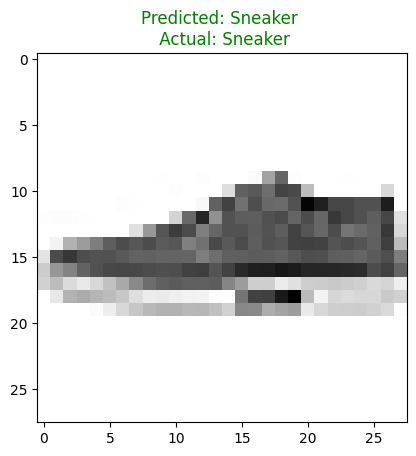

In [182]:
image_index = np.random.randint((len(X_test_normalized)))
selected_image = X_test_normalized[image_index]
# selected_image = selected_image.reshape(selected_image.shape[0],selected_image.shape[1]) # Throws error for some reason about shape
selected_image = selected_image.reshape(1,selected_image.shape[0],selected_image.shape[1]) # Need to add batch size dimension

y_predicted_classes = ideal_lr_multiclass_classification_model.predict(selected_image)
y_predicted_class = np.argmax(y_predicted_classes, axis=1)


plt.imshow(selected_image[0], cmap=plt.cm.binary) # Added batch rank, so to just get the image I have to index the 3D grid which gets the 28x28 matrix
if class_names[y_predicted_class[0]] == class_names[y_test[image_index]]:
  plt.title(f"Predicted: {class_names[y_predicted_class[0]]} \n Actual: {class_names[y_test[image_index]]}", color="green")
else:
  plt.title(f"Predicted: {class_names[y_predicted_class[0]]} \n Actual: {class_names[y_test[image_index]]}", color="red")
